# Twitter US Airline Sentiment

From Original Source:

---

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

The dataset consists of 15 columns having airline sentiment and which airline as important columns. Here we have 6 airlines with sentiments categorized as Negative, Neutral and Positive.

Connecting to Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import Libraries

import pandas as pd
import numpy as np
import fastai
from fastai import *
from fastai.text import *
from functools import partial
from fastai.metrics import accuracy
# import gc
# from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from sklearn.model_selection import train_test_split
import sklearn
from nltk.corpus import stopwords
import nltk 
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# nltk.download('stopwords')

In [0]:
# Read csv

df = pd.read_csv("/content/drive/My Drive/Tweets.csv")
df1 = df.copy()

# Exploratory Data Analysis

In [0]:
# Null Data Count
np.count_nonzero(df.isnull())

61962

In [0]:
# Get Data Dimenions.
df.shape

(14640, 15)

In [0]:
# Data Head.
df.head(4)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)


In [0]:
# Data Columns.
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [0]:
# Count and see what percent of data is Null.

for i in list(df.columns):
  print(i+" "+str(df[i].isnull().sum())+" : Percentage :"+str(df[i].isnull().sum()*100/len(df[i])))

tweet_id 0 : Percentage :0.0
airline_sentiment 0 : Percentage :0.0
airline_sentiment_confidence 0 : Percentage :0.0
negativereason 5462 : Percentage :37.30874316939891
negativereason_confidence 4118 : Percentage :28.128415300546447
airline 0 : Percentage :0.0
airline_sentiment_gold 14600 : Percentage :99.72677595628416
name 0 : Percentage :0.0
negativereason_gold 14608 : Percentage :99.78142076502732
retweet_count 0 : Percentage :0.0
text 0 : Percentage :0.0
tweet_coord 13621 : Percentage :93.0396174863388
tweet_created 0 : Percentage :0.0
tweet_location 4733 : Percentage :32.3292349726776
user_timezone 4820 : Percentage :32.923497267759565


In [0]:
# Drop the columns with most null values.

# The columns 
# 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord' 
# have more than 90% null values. So dropping them.

df.drop(columns=['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], inplace=True)

In [0]:
# Retweet count column has most of null values. So it's better to drop.
len(df[df['retweet_count'] == 0]) / len(df)

0.9476092896174864

In [0]:
df.drop(columns=['retweet_count'], inplace=True)

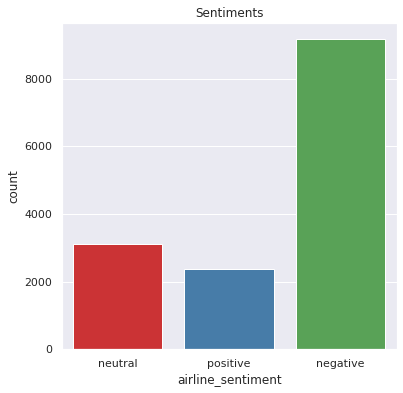

In [0]:
# Sentiments graph.

sns.set()
plt.figure(figsize=(6, 6))
sns.countplot(x=df.airline_sentiment,palette="Set1")
plt.title("Sentiments")
plt.show()

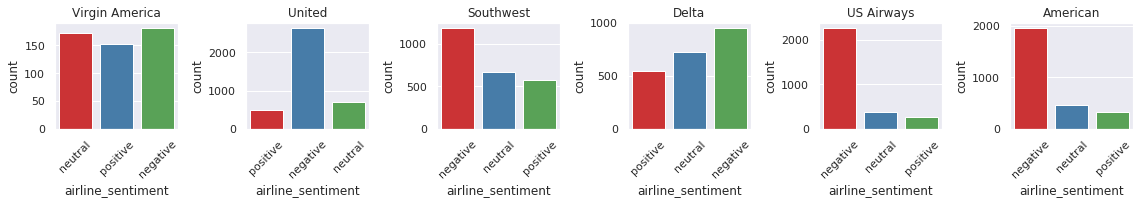

In [0]:
# Sentiments based on different airlines.

plt.subplots(figsize=(16,3),tight_layout=True)
p=1
for i in df.airline.unique():
  plt.subplot(1, 6, p)
  x = df[df.airline == i]  
  sns.countplot(x.airline_sentiment,palette="Set1")
  plt.xticks(rotation=45)
  plt.title(i)
  p +=1
plt.show()

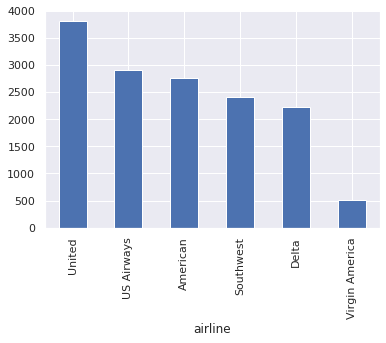

In [0]:
# Airline sentiments. How many reviews per airline.

df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False).plot(kind='bar')

In [0]:
# Type of sentiments.

df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

# Data Pre-Processing for NLP

In [0]:
# Split the data text column for cleaning.

df.text = df.text.str.split()

In [0]:
# Remove the user name that starts with @ from the tweet.

df.text = [' '.join([i for i in x if not i.startswith('@')]) for x in df.text]

In [0]:
# Make all text to lower case.

df.text = df.text.str.lower()

In [0]:
# Import spacy library for tokenization.

import spacy
nlp = spacy.load('en_core_web_sm')

In [0]:
# Tokenize text column using spacy.

df.text = [[i.text for i in nlp(token)] for token in df.text]

In [0]:
# Remove non alpha characters.

df.text = [[k for k in i if k.isalpha()] for i in df.text]

In [0]:
# Remove stopwords.

df.text = [[w for w in words if not w in set(stopwords.words("english"))] for words in df.text]

#### Word Cloud for Positive, Neutral and Negative feeds.


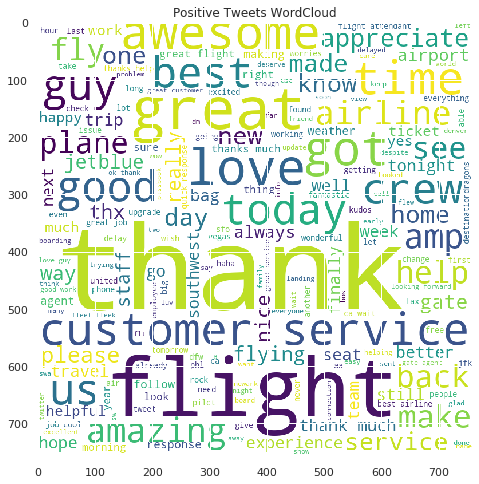

In [0]:
# Word Cloud for Positive Comments.

poscomments = " ".join([" ".join(x) for x in df[df.airline_sentiment == 'positive'].text])
wordcloud = WordCloud(width = 760, height = 760, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 10).generate(poscomments) 
      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.title("Positive Tweets WordCloud")
plt.show()

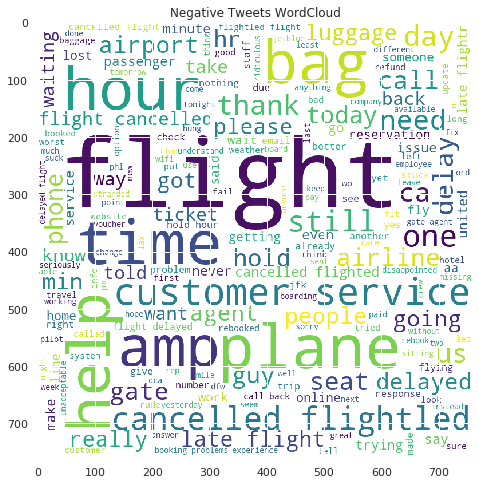

In [0]:
# Word Cloud for Negative Comments.

negcomments = " ".join([" ".join(x) for x in df[df.airline_sentiment == 'negative'].text])
wordcloud = WordCloud(width = 760, height = 760, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 10).generate(negcomments) 
      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.title("Negative Tweets WordCloud")
plt.show()

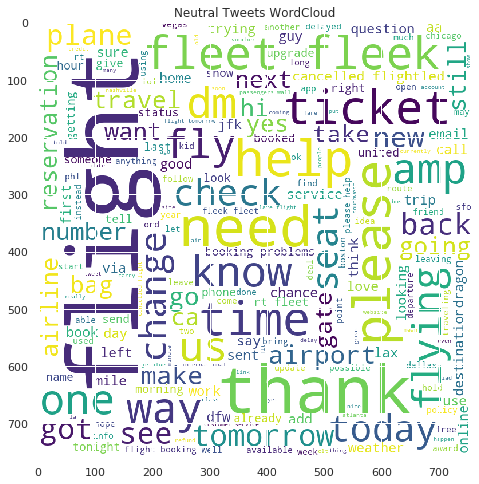

In [0]:
# Word Cloud for Neutral Comments.

neucomments = " ".join([" ".join(x) for x in df[df.airline_sentiment == 'neutral'].text])
wordcloud = WordCloud(width = 760, height = 760, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 10).generate(neucomments) 
      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.title("Neutral Tweets WordCloud")
plt.show()

In [0]:
# Copy dataframe for future use.

data_dummy = df.copy()

# Model Building

## Model 1

In [0]:
# Convert airline column to Categorical as it has only 6 categories.
# One Hot Encode airline column.

data_dummy.airline = pd.Categorical(data_dummy.airline)
x = data_dummy[['airline']]
airline_dummies = pd.get_dummies(x, prefix = 'airline')
df = pd.concat([data_dummy, airline_dummies], axis=1)

In [0]:
# Drop airline column as it's not required now.

df = df.drop('airline', axis = 1)

In [0]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,name,text,tweet_created,tweet_location,user_timezone,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,570306133677760513,neutral,1.0000,NaN,NaN,cairdin,[said],2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0,0,0,0,0,1
1,570301130888122368,positive,0.3486,NaN,0.0000,jnardino,"[plus, added, commercials, experience, tacky]",2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0,0,0,0,0,1
2,570301083672813571,neutral,0.6837,NaN,NaN,yvonnalynn,"[today, must, mean, need, take, another, trip]",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0,0,0,0,0,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,jnardino,"[really, aggressive, blast, obnoxious, enterta...",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0,0,0,0,0,1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,jnardino,"[really, big, bad, thing]",2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0,0,0,0,0,1


In [0]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'name', 'text',
       'tweet_created', 'tweet_location', 'user_timezone', 'airline_American',
       'airline_Delta', 'airline_Southwest', 'airline_US Airways',
       'airline_United', 'airline_Virgin America'],
      dtype='object')

In [0]:
# Selecting only required columns to train the model.

df_new = df[["airline_sentiment","text",'airline_American',
       'airline_Delta', 'airline_Southwest', 'airline_US Airways',
       'airline_United', 'airline_Virgin America']]

In [0]:
# Using LabelEncoder to transform categorical text data of airline sentiment to numerical format.
# This conversion enables better prediction.

encoder = LabelEncoder()
df_new["airline_sentiment"] = encoder.fit_transform(df_new["airline_sentiment"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
print(encoder.classes_)

['negative' 'neutral' 'positive']


In [0]:
# df_new.text = [" ".join(x) for x in df_new.text]

In [0]:
df_new.head()

,airline_sentiment,text,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1,[said],0,0,0,0,0,1
1,2,"[plus, added, commercials, experience, tacky]",0,0,0,0,0,1
2,1,"[today, must, mean, need, take, another, trip]",0,0,0,0,0,1
3,0,"[really, aggressive, blast, obnoxious, enterta...",0,0,0,0,0,1
4,0,"[really, big, bad, thing]",0,0,0,0,0,1


In [0]:
# Generate Training and Validation Datasets.

train, valid = train_test_split(df_new, test_size = 0.2, random_state = 121)

In [0]:
# Generate model using TextLMDataBunch.

model = TextLMDataBunch.from_df(train_df = train, valid_df = valid, path = "")

In [0]:
# language_model_learner is used to predict next word in the sentence.
# AWD_LSTM is an architecture for text, that was pretrained on the english wikipedia.
# drop_mult is applied to all the dropouts weights of the config.

learn = language_model_learner(model, arch=AWD_LSTM, drop_mult=0.2)

In [0]:
# used 1cycle policy to fit the model.

learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.883530,1.660414,0.756427,14:06


In [0]:
# Unfreeze entire model. fit_one_cycle will update weights on all layers.

learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-2, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,1.633979,1.579127,0.759561,21:45
1,1.594343,1.561032,0.762212,21:44
2,1.562338,1.535092,0.764462,21:40
3,1.510211,1.524958,0.765941,21:25
4,1.462984,1.526285,0.765532,21:18


#### Here in this model we achieved an accuracy of 76%.

#### This model is built by taking limited columns and converting airline data in to categorical format.

In [0]:
# Save the model.

learn.save_encoder('ft_enc2')

## Model 2

In [0]:
# Convert the airline sentiment column to numerical format.

df['airline_sentiment']=df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1 if x == 'neutral' else 2)

In [0]:
# Split data into train and validation.

df_train, df_valid = train_test_split(df, stratify = df['airline_sentiment'], test_size = 0.2, random_state = 123)

In [0]:
model1 = TextLMDataBunch.from_df(train_df = df_train, valid_df = df_valid, path = "")

In [0]:
learn1 = language_model_learner(model1, arch=AWD_LSTM, drop_mult=0.4)

In [0]:
learn1.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.966448,4.414352,0.223661,00:48


In [0]:
learn1.unfreeze()
learn1.fit_one_cycle(5, slice(1e-2, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,2.126039,0.476487,0.812612,01:16
1,1.273035,0.471458,0.812612,01:16
2,0.977742,0.467403,0.812612,01:16
3,0.827194,0.465746,0.812612,01:16
4,0.738442,0.465625,0.812612,01:16


In [0]:
learn.save_encoder('model1')

#### Here I got a model accuracy of 81.26 which is pretty good when compared to previous model.

#### Now comparing the two models above, the model with accuracy of 81% should perform better in the testing set. Besides as the fast.ai uses Neural networks with bi directional transformer enabled, I believe that ULMFit will perform better than BERT and Bi-directional LSTMs.

### Finally I obtained an Accuracy > 80%